<a href="https://colab.research.google.com/github/KayalvizhiT513/Machine-Learning-Algorithms/blob/main/MMC_vs_SVC_vs_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 607.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import sklearn.model_selection as skm
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from ISLP.svm import plot as plot_svm
from ISLP import confusion_table

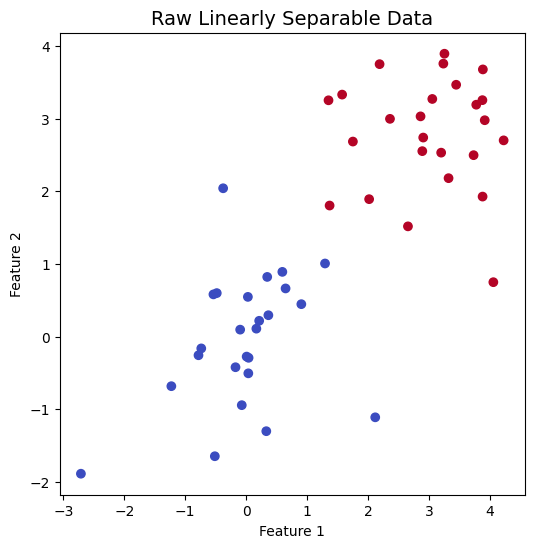

In [4]:
# Initialize data and helper
rng = np.random.default_rng(1)

def plot_title(ax, title):
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# 1.1 Linearly separable data
X = rng.standard_normal((50, 2))
y = np.array([-1]*25 + [1]*25)
X[y == 1] += 3

# Plot raw data
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)
plot_title(ax, "Raw Linearly Separable Data")
plt.show()

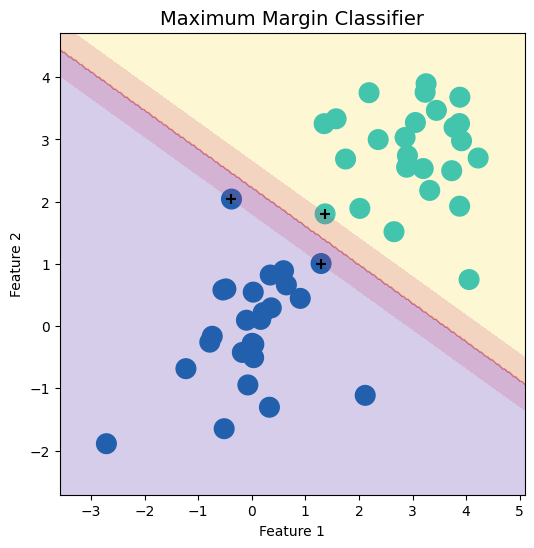

In [5]:
# 1.1 MMC with large C (hard margin)
svm_hard = SVC(C=10, kernel='linear')
svm_hard.fit(X, y)
fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(X, y, svm_hard, ax=ax)
plot_title(ax, "Maximum Margin Classifier")
plt.show()

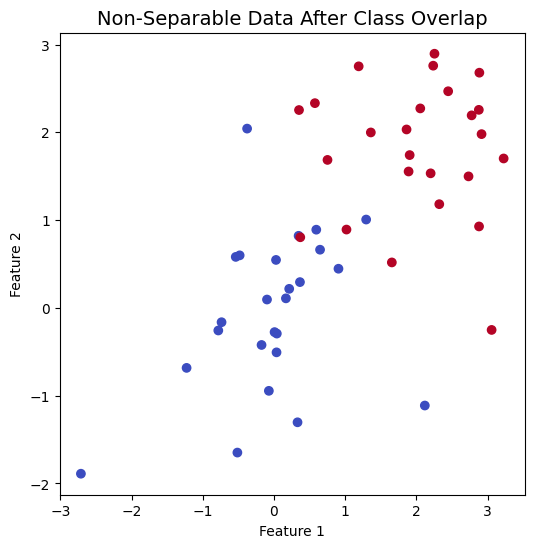

In [6]:
# 2.1 Linearly non-separable data (pushed overlap)
X[y == 1] -= 1
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)
plot_title(ax, "Non-Separable Data After Class Overlap")
plt.show()

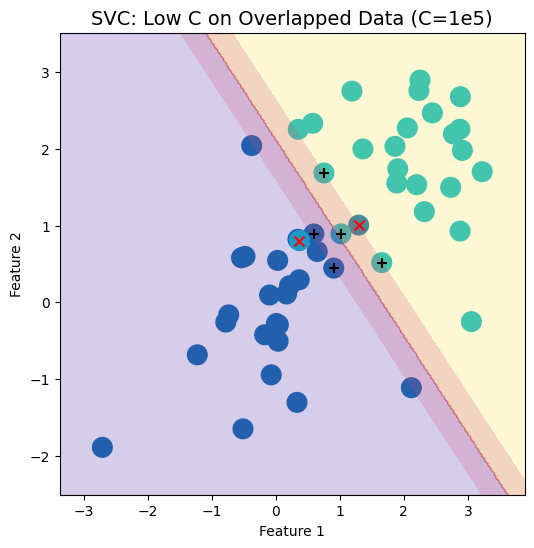

In [7]:
# 2.2 Retrain SVMs on overlapped data
svm_hard2 = SVC(C=1e5, kernel='linear').fit(X, y)
fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(X, y, svm_hard2, ax=ax)
plot_title(ax, "SVC: Low C on Overlapped Data (C=1e5)")
plt.show()

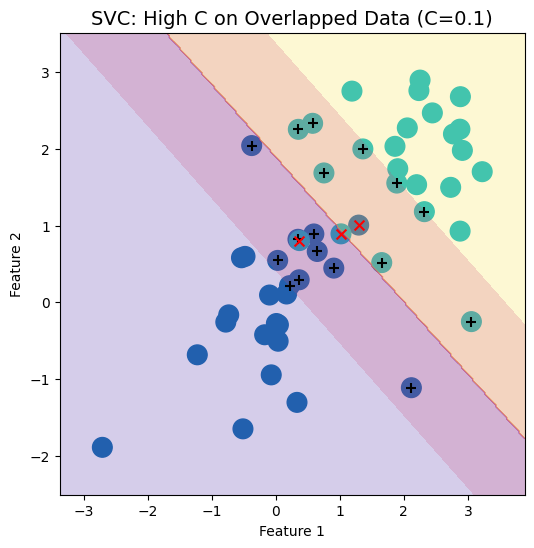

In [8]:
svm_soft2 = SVC(C=0.1, kernel='linear').fit(X, y)
fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(X, y, svm_soft2, ax=ax)
plot_title(ax, "SVC: High C on Overlapped Data (C=0.1)")
plt.show()

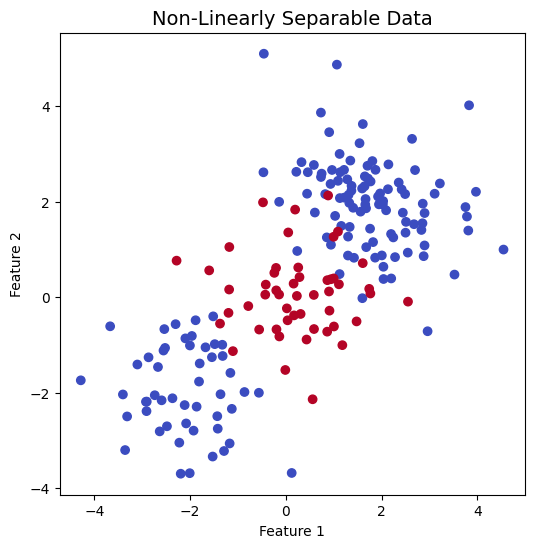

In [9]:
# 3.1 Non-linear data for RBF SVM
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)
plot_title(ax, "Non-Linearly Separable Data")
plt.show()

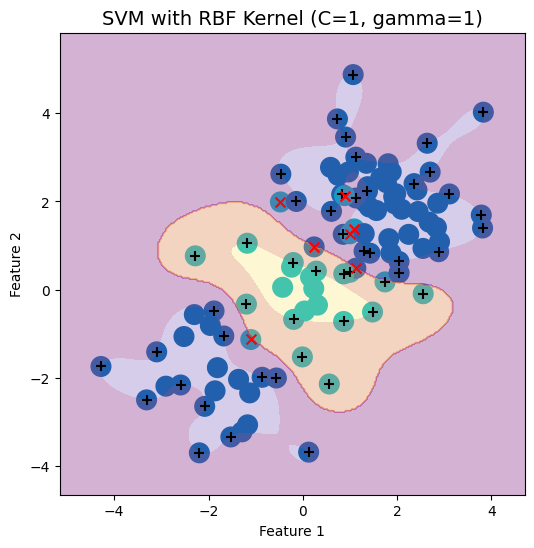

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=0)

# 3.2 SVM with RBF kernel (low C)
svm_rbf_lowC = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf_lowC.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(X_train, y_train, svm_rbf_lowC, ax=ax)
plot_title(ax, "SVM with RBF Kernel (C=1, gamma=1)")
plt.show()

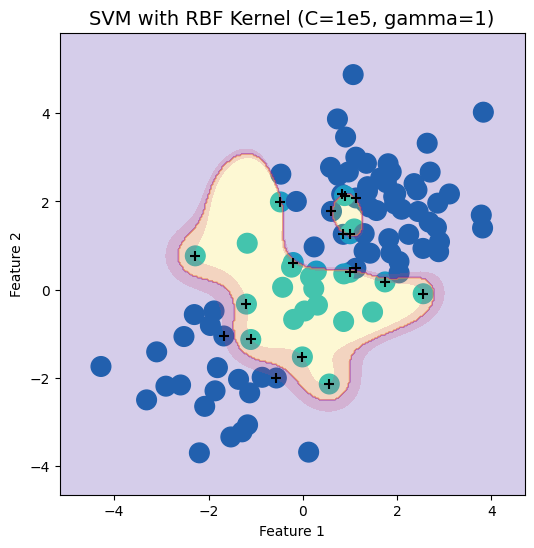

In [11]:
# 3.3 SVM with RBF kernel (high C)
svm_rbf_highC = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf_highC.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(X_train, y_train, svm_rbf_highC, ax=ax)
plot_title(ax, "SVM with RBF Kernel (C=1e5, gamma=1)")
plt.show()